# **2 (Option I). (Trends, Searches, and Sentiment)** 
2 (Option I). (Trends, Searches, and Sentiment)** <br>a. Use the Twitter Trends API to determine the available trending topics for a city of your choice, assigning a tweet volume of 5000 to any trend with no volume provided.

 <br>b. After sorting the trends in descending order by volume, create a bar graph with each (sorted) trend on the x-axis against its volume on the y-axis. 
 
 <br>c. Use the Twitter Search API to find 20 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets. 
 
 <br>d. Use `TextBlob` to determine the sentiment for each set of 20 tweets.  
 
 <br> i. Do you notice a substantial difference in the proportion of positive and negative sentiment for the three trends?  Try to theorize why or why not.  
 
 <br> ii. Do you believe the sentiment analysis to be reliable for any or all of the trend?  Explain why or why not.



## Twitter Trends, Searches, and Sentiment

### Load API Keys
 


In [1]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


### Basic Tweepy Commands

In [2]:
cbhami02 = api.get_user('cbhami02')

In [3]:
api = tweepy.API(auth)


In [4]:
user_info = api.get_user(screen_name='cbhami02')
print(user_info)

User(_api=<tweepy.api.API object at 0x0000024B3B55A580>, _json={'id': 1515682874837643269, 'id_str': '1515682874837643269', 'name': 'Cole Hamilton', 'screen_name': 'Cbhami02', 'location': 'San Antonio, TX', 'profile_location': None, 'description': 'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 90, 'listed_count': 0, 'created_at': 'Sun Apr 17 13:25:44 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 13, 'lang': None, 'status': {'created_at': 'Wed May 11 23:15:22 +0000 2022', 'id': 1524528622719184896, 'id_str': '1524528622719184896', 'text': '“Complete Exploratory Data Analysis using Python” by Uğur Savcı\nhttps://t.co/Vp44o2jQTU https://t.co/bEf5HBRtt8', 'truncated': False, 'entities': {'hashtags': [], '

In [5]:
print(f'{user_info.followers_count} users are following {user_info.screen_name}.')

1 users are following Cbhami02.


In [6]:
user_info.name  # name associated with the user’s account

'Cole Hamilton'

In [7]:
user_info.screen_name  # user’s Twitter handle

'Cbhami02'

In [8]:
user_info.description  # description from the user’s profile

'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.'

In [9]:
user_info.status  # most recent tweet's text

Status(_api=<tweepy.api.API object at 0x0000024B3B55A580>, _json={'created_at': 'Wed May 11 23:15:22 +0000 2022', 'id': 1524528622719184896, 'id_str': '1524528622719184896', 'text': '“Complete Exploratory Data Analysis using Python” by Uğur Savcı\nhttps://t.co/Vp44o2jQTU https://t.co/bEf5HBRtt8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Vp44o2jQTU', 'expanded_url': 'https://link.medium.com/IobrYt5fXpb', 'display_url': 'link.medium.com/IobrYt5fXpb', 'indices': [64, 87]}], 'media': [{'id': 1524528618034106370, 'id_str': '1524528618034106370', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FSg2s2fXEAIom5R.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FSg2s2fXEAIom5R.jpg', 'url': 'https://t.co/bEf5HBRtt8', 'display_url': 'pic.twitter.com/bEf5HBRtt8', 'expanded_url': 'https://twitter.com/Cbhami02/status/1524528622719184896/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'res

In [10]:
print(f'{user_info.screen_name} is following {user_info.friends_count} users.')

Cbhami02 is following 90 users.


### Tweepy API User Info

In [11]:
api = tweepy.API(auth)

In [12]:
me = api.verify_credentials()

In [13]:
me.name

'Cole'

In [14]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 20 follower.
I am following 164 users.


### Rate Limits

In [15]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1652407251},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1652407251},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1652407251},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1652407251},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1652407251},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1652407251},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1652407251},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1652407251},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1652407251},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1652407251},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1652407

In [16]:
cbhami02=api.get_user(screen_name='cbhami02')


In [17]:
print(api.rate_limit_status()['resources']['users']['/users/:id'])

{'limit': 900, 'remaining': 897, 'reset': 1652407249}


In [18]:
print(api.rate_limit_status()['resources']['application']['/application/rate_limit_status'])

{'limit': 180, 'remaining': 180, 'reset': 1652407252}


### Followers

In [19]:
cursor = tweepy.Cursor(api.followers)

In [20]:
followers = []  # for storing followers' User objects
for account in cursor.items(15):  # request only 10 results (10 most recent followers in this case)
    followers.append(account.screen_name)

In [21]:
print('Followers:', 
      ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers: 1SG_Hamilton adore_myBitches BrockCline ChildsSherry GucciManeNtail HamptonRFinest mwyattea OrderUpFayville PjCarl porge10 sayedabdulqadee shefferba49 soldiersofpaint VA_HomeLoan yongkuansima


In [22]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)
followers = []
for account in cursor.items(10):  # request 2 pages of followers
    followers.append(account.screen_name)

print(followers)

['Air19Javi', 'felipejfmg', 'liusiyu50658233', 'artho7', 'Brandon14005766', 'DarrellFuglseth', 'Blockhead_29', 'sshugaa', '_ianst', 'AugustoSena1234']


In [23]:
cursor = tweepy.Cursor(api.followers_ids, screen_name='nasa', count=5000)
followers_ids = []
for accountid in cursor.items(5000): #request 1 page of follower_ids
    followers_ids.append(accountid)

In [24]:
followers_ids_fragments = [followers_ids[i * 100:(i + 1) * 100] for i in range((len(followers_ids) + 100 - 1) // 100 )] 
print (followers_ids_fragments[0])

[1208080393544622081, 852914851, 1524928634754314245, 1297513748, 1524924163542089738, 1524927386717921282, 1524927309085659136, 133139159, 1524927003710787584, 1524926429535805461, 1524928518505009152, 1524928513358307328, 1524928349914574849, 1524927862478086144, 1524927186549239809, 1524925187312975875, 1523463328672190464, 1524928036054847488, 1524927708114853905, 1524928063477260288, 1423700295326961666, 1459368348962242560, 1524928607327494148, 1368322923568726017, 1524928454642216960, 1524928447369269249, 1524925021088624641, 1506191677404463108, 1524926765168111617, 1524927822812172288, 1524927525398388741, 186625635, 1524928557540986880, 1524927111328325632, 1445386791255687170, 1499663391413047300, 1524928467208482816, 1524927393026154505, 1524927048363352064, 1524748609928847360, 306000351, 1524928173019897861, 1480678001322901510, 1524925010724388871, 1524928523575922688, 2762982193, 1524925868446982302, 1524926615821910016, 1524926251592712192, 1524927262683955200, 1524927

### Rate Limits

In [25]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])


{'limit': 15, 'remaining': 14, 'reset': 1652407254}


In [26]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1652407254}


### Search Tweets by Topic

In [27]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [28]:
tweets = api.search(q='Johnny Depp', count=3)

In [29]:
print_tweets(tweets) 

Dlmoodyfan77: We stand with Johnny Depp, not Marilyn Manson! #amberheard PR team is behind this! #justiceforJohnnyDepp… https://t.co/7IpkEHfIMP

TopKat04767754: All Audio Recordings Played in Johnny Depp &amp; Amber Heard Defamation Tria... https://t.co/BJyHVl7TA8 via @YouTube

carolzinhvarga: 
  ORIGINAL: RT @parkgirl_: O que a mídia não mostra e você deveria saber sobre o caso de Amber Heard x Johnny Depp  - a thread 

#IStandWithAmberHeard…
Unable to translate tweet


In [30]:
tweets = api.search(q='Johnny Depp :)', count=3) #Only "positive sentiment tweets involving basketball"

In [31]:
tweets = api.search(q='#Heard', count=5)

In [32]:
print_tweets(tweets)

SichuanDaily: Morning🌿🌿
Have you ever #heard about #Epiphyllum?
A photographer who #lived in #Chengdu recorded this beautiful… https://t.co/PFZe1nWLZY

ElHorizontemx: 
  ORIGINAL: En redes sociales se ha hecho viral un test sobre la famosa y aquí te decimos cuál es 👇👇👇

¡No olvides decirnos cóm… https://t.co/33LQoao6P5
Unable to translate tweet
LakotaScientist: The perfect domestic violence victim is a dead one.
That's why you make fun of #AmberHeard.
You wan't to torture he… https://t.co/HveTj4HjZO

Gee_McK: Who did it better #Depp #Heard #Rooney #Vardy

therealpabloalf: Amber Heard pushes The Innocent Pirate to ‘tell the world’ he’s a victim of domestic violence on taped phone call… https://t.co/zKL0dX7iwz



### Trends Available

In [33]:
trends_available = api.trends_available()

In [34]:
len(trends_available)

467

In [35]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [36]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [37]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [38]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [39]:
world_trends[4]

{'name': 'Doc Rivers',
 'url': 'http://twitter.com/search?q=%22Doc+Rivers%22',
 'promoted_content': None,
 'query': '%22Doc+Rivers%22',
 'tweet_volume': None}

In [40]:
for iter in range(3):
    print(world_trends[iter])

{'name': 'Harden', 'url': 'http://twitter.com/search?q=Harden', 'promoted_content': None, 'query': 'Harden', 'tweet_volume': 67309}
{'name': 'Sixers', 'url': 'http://twitter.com/search?q=Sixers', 'promoted_content': None, 'query': 'Sixers', 'tweet_volume': 55231}
{'name': 'Cruzeiro', 'url': 'http://twitter.com/search?q=Cruzeiro', 'promoted_content': None, 'query': 'Cruzeiro', 'tweet_volume': 93487}


In [41]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 31
Total world trends >100k volume: 4


### World_Trends

In [42]:
from operator import itemgetter 

In [43]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 31


In [44]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [45]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

#Eurovision
Arsenal
Kendrick
My Chemical Romance
Cruzeiro
Rand Paul
Harden
Sixers
Burna
Chargers


### SA_Trends

In [46]:
SA_trends_comp = api.trends_place(id=2487796)

In [47]:
SA_trends = SA_trends_comp[0]['trends']

In [48]:
SA_trends_baseline = [t for t in SA_trends if t['tweet_volume']]

In [49]:
for trend in SA_trends_baseline:
    print(trend)

{'name': 'Stephen A', 'url': 'http://twitter.com/search?q=%22Stephen+A%22', 'promoted_content': None, 'query': '%22Stephen+A%22', 'tweet_volume': 22916}
{'name': 'Packers', 'url': 'http://twitter.com/search?q=Packers', 'promoted_content': None, 'query': 'Packers', 'tweet_volume': 19137}
{'name': 'Sean', 'url': 'http://twitter.com/search?q=Sean', 'promoted_content': None, 'query': 'Sean', 'tweet_volume': 136293}
{'name': 'Friday the 13th', 'url': 'http://twitter.com/search?q=%22Friday+the+13th%22', 'promoted_content': None, 'query': '%22Friday+the+13th%22', 'tweet_volume': 47859}
{'name': 'Arsenal', 'url': 'http://twitter.com/search?q=Arsenal', 'promoted_content': None, 'query': 'Arsenal', 'tweet_volume': 350902}
{'name': 'Bears', 'url': 'http://twitter.com/search?q=Bears', 'promoted_content': None, 'query': 'Bears', 'tweet_volume': 49412}
{'name': 'Ezra Miller', 'url': 'http://twitter.com/search?q=%22Ezra+Miller%22', 'promoted_content': None, 'query': '%22Ezra+Miller%22', 'tweet_volume

In [50]:
print(f'SA trends >15k volume: {len(SA_trends_baseline)}')


SA trends >15k volume: 29


In [51]:
SA_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) 

In [52]:
for trend in SA_trends_baseline[:20]:
    print(trend['name'])

Arsenal
Babies
Finland
Sean
My Chemical Romance
Rand Paul
Harden
Greg
Sixers
Chargers
Bears
Friday the 13th
Twins
Embiid
Game 7
Philly
Hannity
Ezra Miller
New MCR
#COYS


In [53]:
SA_topics = {}  # dictionary to store trend names and volumes for San Antonio


In [54]:
print(SA_topics)

{}


In [55]:
for trend in SA_trends_baseline:
    SA_topics[trend['name']] = trend['tweet_volume']

In [56]:
import pandas as pd

SAdf = pd.DataFrame(SA_topics, index = [0]) 

In [57]:
SAdf.head()

,Arsenal,Babies,Finland,Sean,My Chemical Romance,Rand Paul,Harden,Greg,Sixers,Chargers,...,#COYS,Raiders,Stephen A,Gerard,Cowboys,Packers,76ers,Rams,Jimmy Butler,Eastern Conference Finals
0,350902,298794,169219,136293,101835,78807,65938,61905,55231,52834,...,25044,24258,22916,22392,21878,19137,17708,16082,12633,12391


<AxesSubplot:title={'center':'Twitter Trends in San Antonio'}, xlabel='Trends', ylabel='Count'>

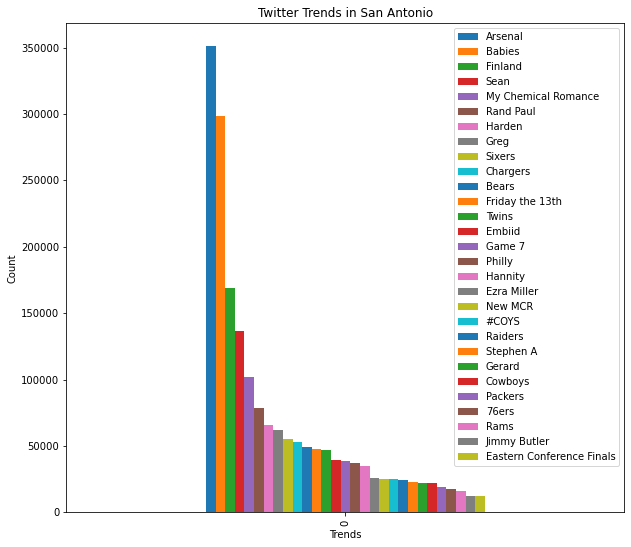

In [58]:
#Plot Descending
SAdf.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="Twitter Trends in San Antonio")

### WordCloud for SA_Trends

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))

wordcloud_SA = WordCloud(mask=mask, width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=10, colormap='prism', 
    background_color='white')

In [61]:
wordcloud_SA = wordcloud_SA.fit_words(SA_topics)

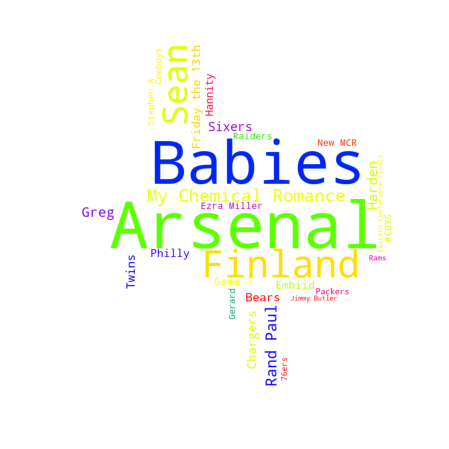

In [62]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_SA)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [63]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [64]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [65]:
p.clean(tweet_text)

'A sample retweet with a URL'

### Tweet Listener - Load Top Three Trends

In [66]:
tweetlistraw1,tweetlistprep1 = prepsubject('Macron',20)
tweetlistraw2,tweetlistprep2 = prepsubject('Ranboo',20)
tweetlistraw3,tweetlistprep3 = prepsubject('Publix',20)

### Number 1 Tweet Topic

In [67]:
tweetlistraw1

['@OfBritons @guardian If that were true, why would he be giving masses of lethal weapons to Ukraine. Look at the fac… https://t.co/8aDVfI8q5U',
 "RT @SamRamani2: Full details on the EU's plans to assess Ukraine's application here. Emmanuel Macron admitted this week that Ukraine is unl…",
 'RT @mhmck: French President Emmanuel Macron says "don\'t humiliate Russia".\n\nI say don\'t humiliate Ukraine, as France did in 1919 when the T…',
 '2/3🧵#POV important to understand, including #German delusion that trade prevents #war, thus justifying #NordStream2… https://t.co/8OLPgxR6tP',
 'RT @glhermine: 🇫🇷 The change in the Macron vote since 2017 generally shows gains in traditionally right-wing areas, and loses in left-wing…',
 '@JanGilb33464730 To do a macron 😂😭',
 'RT @JustinTrudeau: We also discussed the war in Ukraine, and the impacts it is having on energy prices and food security. We agreed to cont…',
 "@mcr_lb @guardian They had close relations Russian oligarchs with before the war too. 

In [68]:
tweetlistprep1

['If that were true, why would he be giving masses of lethal weapons to Ukraine. Look at the fac',
 ": Full details on the EU's plans to assess Ukraine's application here. Emmanuel Macron admitted this week that Ukraine is unl",
 ': French President Emmanuel Macron says "don\'t humiliate Russia".I say don\'t humiliate Ukraine, as France did in when the T',
 '/3 important to understand, including delusion that trade prevents , thus justifying',
 ': The change in the Macron vote since generally shows gains in traditionally right-wing areas, and loses in left-wing',
 'To do a macron',
 ': We also discussed the war in Ukraine, and the impacts it is having on energy prices and food security. We agreed to cont',
 "They had close relations Russian oligarchs with before the war too. They love Boris. He's shown b",
 '"There is little need for another over-arch',
 ": welcomed Bill Gates to Paris, expressing gratitude to the oligarch for accepting the EU's offer to globally ove",
 ": Macron's vot

### Number 2 Tweet Topic

In [69]:
tweetlistraw2

['RT @LoopyMinecraft: WILBUR GRIAN SCAR RANBOO MCC TEAM \n                   🕯️\n            🕯              🕯\n      🕯…',
 'ranboo should get a shirt like that',
 'RT @CreatesCupcake: Daily doodle of Ranboo day 53!\n\nNew friends :D\n\n#ranboofanart https://t.co/NU0351WxKF',
 'RT @bunnoroll: @Lynx_does_stuff hi i’m clem i’m a black artist that mostly draws ranboo and other stuff like my sona https://t.co/yk8lQZNvMr',
 'RT @valeria_pryanik: // eyestrain \n\nglitchy ranboo \n#ranboofanart @ranbooart https://t.co/YmB1cQnCHy',
 'RT @MolochnijOtaku: aaaand its finally done! \nboober cosplay :D\nthis cosplay is very heavily based on @xMaruu11 ranboo design!!! :]]\n\nthank…',
 'RT @ne0neclipse: @webble_jsc // blood in first two\nYAYAYAY HAPPY BIRTHDAY YOINK !!!!\nhi im katie and i draw mostly ranboo and some other cc…',
 'RT @MCYTanything: Tubbo just got a tattoo of Ranboo! https://t.co/AMw3EY4Y0i',
 'RT @LoopyMinecraft: WILBUR GRIAN SCAR RANBOO MCC TEAM \n                   🕯️\n            🕯

In [70]:
tweetlistprep2

[': WILBUR GRIAN SCAR RANBOO MCC TEAM',
 'ranboo should get a shirt like that',
 ': Daily doodle of Ranboo day !New friends',
 ': hi im clem im a black artist that mostly draws ranboo and other stuff like my sona',
 ': // eyestrain glitchy ranboo',
 ': aaaand its finally done! boober cosplay this cosplay is very heavily based on ranboo design!!! :]]thank',
 ': // blood in first twoYAYAYAY HAPPY BIRTHDAY YOINK !!!!hi im katie and i draw mostly ranboo and some other cc',
 ': Tubbo just got a tattoo of Ranboo!',
 ': WILBUR GRIAN SCAR RANBOO MCC TEAM',
 ': Daily doodle of Ranboo day !New friends',
 'sleepi do you like my original ranboo fanart',
 ': (rts are appreciated)',
 ": Holy shit it's a quirked up white boy with a little bit of swag!!",
 'I MIGHT CHANGE JUNOS FC TO RANBOO',
 'WHY ARE THEY STILL USING RANBOOs PICTURE??????',
 ': (rts are appreciated)',
 ': WILBUR GRIAN SCAR RANBOO MCC TEAM',
 ": Ranboo is on Aimsey's instagram story!",
 ": HAPPY BORTH YOINK !!!!!! I'm spaced and I dr

### Number 3 Tweet Topic

In [71]:
tweetlistraw3

['@IckyWoodz @_TonyHilfiger Ummm.... I had chipotle mayo.  Shiiitt Publix still open https://t.co/cA5M7ydXmA',
 'I fucking miss being 7 years old, weighing myself on the scale at Publix and seeing I was 42 lbs',
 '@WimminsRea Buddy of mine looooved Sundays at Publix because it was filled with single momma honeys who were grocer… https://t.co/gYavS78Lbo',
 '@smcroasters Publix SR 44 in NSB was looking half or more empty today.',
 '@Jackie_Muzikar @Super70sSports BTW I am in Central Florida.... do they sell at Publix or Walmart, or do I have to order it online?',
 'diego at this publix deli can get it',
 'If I see a little overgrown succulent in need of a home at Publix I will always buy them',
 'otis at publix !!!!!! https://t.co/3KD3LhvukR',
 '@Siefe @TmarTn They’ve been in Publix’s for a while mr. Siefe. Even got tall boy versions!',
 '@fuwur_ @LaundryMaggots Cakeeeee 🤤 I want Publix cake rn so bad',
 'Today in Publix a 45 year old man came up to me and started showing me the houses h

In [72]:
tweetlistprep3

['Ummm.... I had chipotle mayo. Shiiitt Publix still open',
 'I fucking miss being years old, weighing myself on the scale at Publix and seeing I was lbs',
 'Buddy of mine looooved Sundays at Publix because it was filled with single momma honeys who were grocer',
 'Publix SR in NSB was looking half or more empty today.',
 'BTW I am in Central Florida.... do they sell at Publix or Walmart, or do I have to order it online?',
 'diego at this publix deli can get it',
 'If I see a little overgrown succulent in need of a home at Publix I will always buy them',
 'otis at publix !!!!!!',
 'Theyve been in Publixs for a while mr. Siefe. Even got tall boy versions!',
 'Cakeeeee I want Publix cake rn so bad',
 'Today in Publix a year old man came up to me and started showing me the houses he liked in a mountain living magazine',
 ': One of the main reasons I love shopping in Publix here. Some older folks are on limited income and we sometimes get to h',
 'U better be at publix',
 'No need to feel 

## Stream

### Load Packages

In [73]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [74]:
run sentimentlistener.py "#Macron" 20

### Sentiment Listener Topic 2

In [ ]:
run sentimentlistener.py "Ranboo" 20

+ mellohayl: dream saying that ranboo talking about being unlabeled was really validating LET ME GO CRY

  beloved_natalia: DREAM AND RANBOO CRUMBS

- bbygnf: dream saying he felt validated by ranboo excuse me while i SOB MY FUCKING EYES OUT 😭💗💗💗

  Mistoazt: @Rosemybeloved_ RANBOO CAME OUT

+ patito4k: what a great day to be unlabeled. SO PROUD OF YOU RANBOO 💗

+ dogIove24: @dreamsecretclub SO TRUE!! im so proud of ranboo

+ karlseuphoria: I MISSED THE ANNOUNCEMENT BUT IM SO PROUD OF RANBOO OHMMYOGD

  gnfs4k: RANBOO AND DREAM 🥹🥹🥹🥹❤️❤️❤️❤️❤️

  purple_sockss: @dreamsecretclub go ranboo go

+ incelbr: ranboo Coming out gave me whiplash like I completely forgot LGBTQ's were real

+ kaylaXcorpse: @dreamsecretclub Love for ranboo &lt;33

- euthymiapIane: MCYT DSMP RANBOO IS GAY IM SORRY I DONT REALLY CARE BUT THATS CRAZY

+ darlenedytee: i am fucking sobbing dream you whore i lovw you so much how could you do tihs to me i am so proud of you and ranboo…

+ planet_marss_: OH RANBOO LIKE ACT

### Sentiment Listener Topic 3

In [ ]:
run sentimentlistener.py "Publix" 20

  AVR19741: @MiaCathell @JZubosky @Jack_Petocz @Publix Oh please. You demeaned his work, just take the L on this and move on.

+ DalyKenan: @Jack_Petocz @Publix It’s not the Dint say gay bill, that is a fiction.

  Lorigoldst: @Jack_Petocz @grampage_on @Publix I stopped shopping at Publix when I saw they were big contributors for 2nd Amendm…

  trudy_mcquiston: @klmcgee1978 @ProudTwinkie @TaylorLorenz Publix hires at 14.

  red_nov3: @AdamSchiavone @TimRunsHisMouth @Jack_Petocz @Publix “The party of working people?” So workers belong to one party…

+ SharkeyTim: @Jack_Petocz @Publix So brave. Yet so ignorant.

+ CircusHypocrisy: @Jack_Petocz @Publix Public is great. They’ll figure out a way to hire another $10 per hour overly sensitive and fragile cashier boy.

  JerseyMade93: Oh Publix racists

  Garyknowsitall: @davidhogg111 @ChristinaPushaw Jack started working at Publix when he was 13? Doubt it. Either way, youth is no fre…

  AdamMathisFL: @exjon Have it had their sammiches? Publi

In [ ]:
dftrend1 = pd.DataFrame({'Positive' : [15],
'Neutral' : [4],
'Negative' : [1]})
dftrend1.head()


,Positive,Neutral,Negative
0,15,4,1


In [ ]:
dftrend2 = pd.DataFrame({'Positive' : [11],
'Neutral' : [6],
'Negative' : [3]})
dftrend2.head()


,Positive,Neutral,Negative
0,11,6,3


In [ ]:
dftrend3 = pd.DataFrame({'Positive' : [7],
'Neutral' : [11],
'Negative' : [2]})
dftrend3.head()
#dftrend1.to_csv('dfs.csv', index = False)

,Positive,Neutral,Negative
0,7,11,2


<AxesSubplot:title={'center':'#1 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

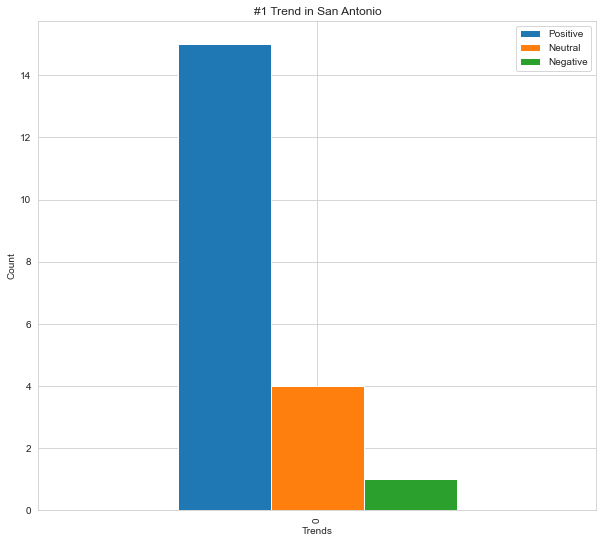

In [ ]:
dftrend1.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#1 Trend in San Antonio")

<AxesSubplot:title={'center':'#2 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

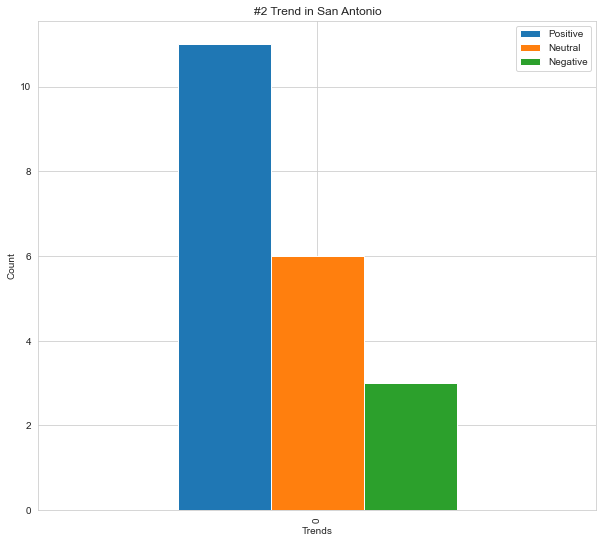

In [ ]:
dftrend2.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#2 Trend in San Antonio")

<AxesSubplot:title={'center':'#3 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

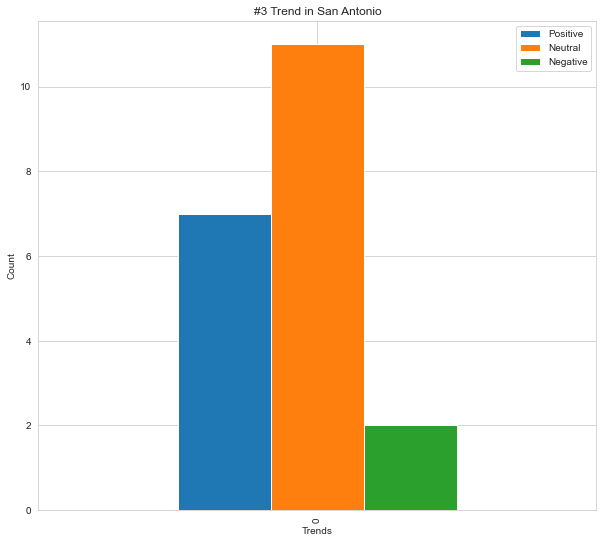

In [ ]:
dftrend3.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#3 Trend in San Antonio")

## Geocoding

In [ ]:
import os
from geopy import OpenMapQuest

In [ ]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222',
             'El Alamein، Egypt']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [ ]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0)),
 Location(العلمين, مطروح, مصر, (30.833944, 28.949268, 0.0))]

In [ ]:
from tweetutilities import get_tweepy_API

In [ ]:
api = get_tweepy_API()

In [ ]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [ ]:
from locationlistener import LocationListener

In [ ]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Will Smith', limit=150)

In [ ]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [ ]:
stream.filter(track=['Will Smith'], languages=['en'], is_async=False)

rmossconti: being able to recall various hilarious Will Smith rap lines is both a gift and a curse but can proudly say I’ve got… https://t.co/ehyZctJ2Ad

Mangakiko12: Steve Harvey has choice words for Will Smith after he slapped Chris Rock at the Oscars https://t.co/B1zWhNzJx6

balogunjide1: OK, Will Smith went too far, slapping Chris Rock with the whole world watching. But should he continue to be punish… https://t.co/5UPSt34c5Z



In [ ]:
counts['total_tweets'] #total tweets examined

8

In [ ]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

4

In [ ]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

50.0%


In [ ]:
from tweetutilities import get_geocodes

In [ ]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [ ]:
tweet_locations_fail

1

In [ ]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

25.0% of the locations could not be deciphered.


### Location Listener DataFrame

In [ ]:
import pandas as pd

In [ ]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft = dft.dropna()

In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft2.shape

(4, 3)

In [ ]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [ ]:
import folium

In [ ]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [ ]:
usmap.save('base_map.html')

In [ ]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

AttributeError: 'Pandas' object has no attribute 'latitude'

In [ ]:
usmap.save('tweet_map.html')

In [ ]:
usmap

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [ ]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [ ]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [ ]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [ ]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [ ]:
import json

In [ ]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [ ]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [ ]:
tweets_from_json

[{'screen_name': 'therealjayber',
  'text': 'Imagine the kind of spellbinding power that Jada wields over Will Smith.\n\nOne unhappy look, and Will was immediatel… https://t.co/lOkKii20KH',
  'location': 'Tweet Smarter. Grow Faster. 👉'},
 {'screen_name': 'chomps443',
  'text': '@LeafyIsHere Will Smith should be white',
  'location': 'The motion of the Ocean'},
 {'screen_name': 'biplov_jha',
  'text': 'What have we learned from Will Smith and Johnny Depp?',
  'location': 'Nepal'},
 {'screen_name': 'KassAssassin',
  'text': 'I know his is ridiculous, but what upsets me the most about the Will Smith thing is, after getting slapped, Chris R… https://t.co/G3oxLaZ7ta',
  'location': 'Brooklyn, NY'}]

C:\Users\coleb\mambaforge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


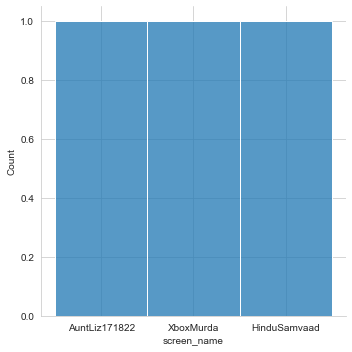

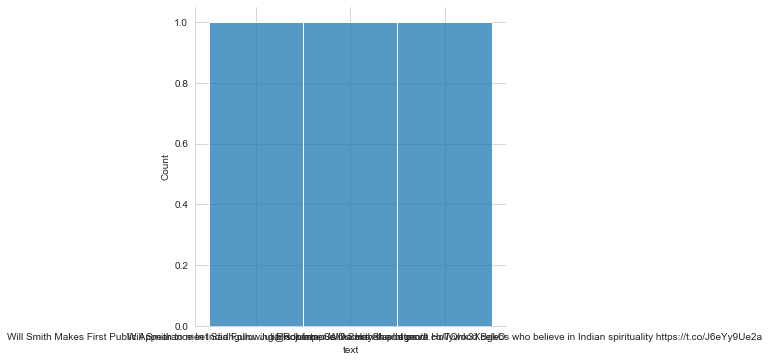

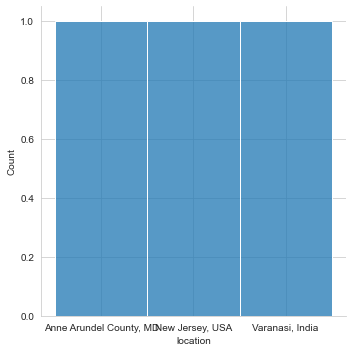

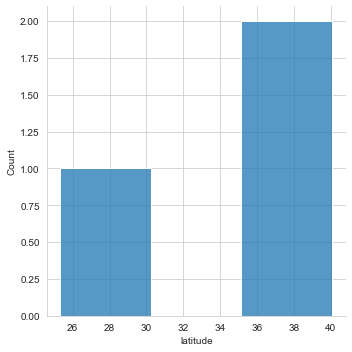

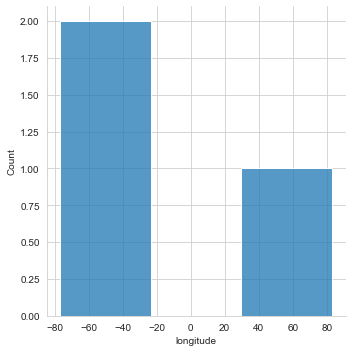

In [ ]:
for column in dft:
    sns.displot(x=column, data=dft)

In [ ]:
dft.corr()

,latitude,longitude
latitude,1.000000,-0.996873
longitude,-0.996873,1.000000


In [ ]:
dft.describe()

,latitude,longitude
count,3.000000,3.000000
mean,34.794549,-22.656662
std,8.210207,91.514389
min,25.335649,-76.573454
25%,32.153954,-75.488808
50%,38.972258,-74.404162
75%,39.523998,4.301733
max,40.075738,83.007629


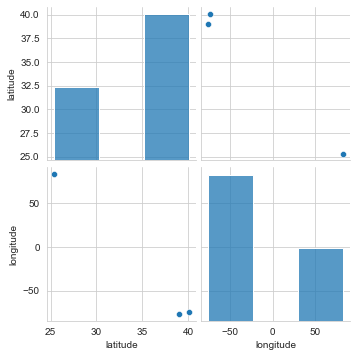

In [ ]:
sns.pairplot(dft)